findfont: Generic family 'sans-serif' not found because none of the following families were found: Montserrat
findfont: Generic family 'sans-serif' not found because none of the following families were found: Montserrat
findfont: Generic family 'sans-serif' not found because none of the following families were found: Montserrat
findfont: Generic family 'sans-serif' not found because none of the following families were found: Montserrat
findfont: Generic family 'sans-serif' not found because none of the following families were found: Montserrat
findfont: Generic family 'sans-serif' not found because none of the following families were found: Montserrat
findfont: Generic family 'sans-serif' not found because none of the following families were found: Montserrat
findfont: Generic family 'sans-serif' not found because none of the following families were found: Montserrat
findfont: Generic family 'sans-serif' not found because none of the following families were found: Montserrat
findfont: 

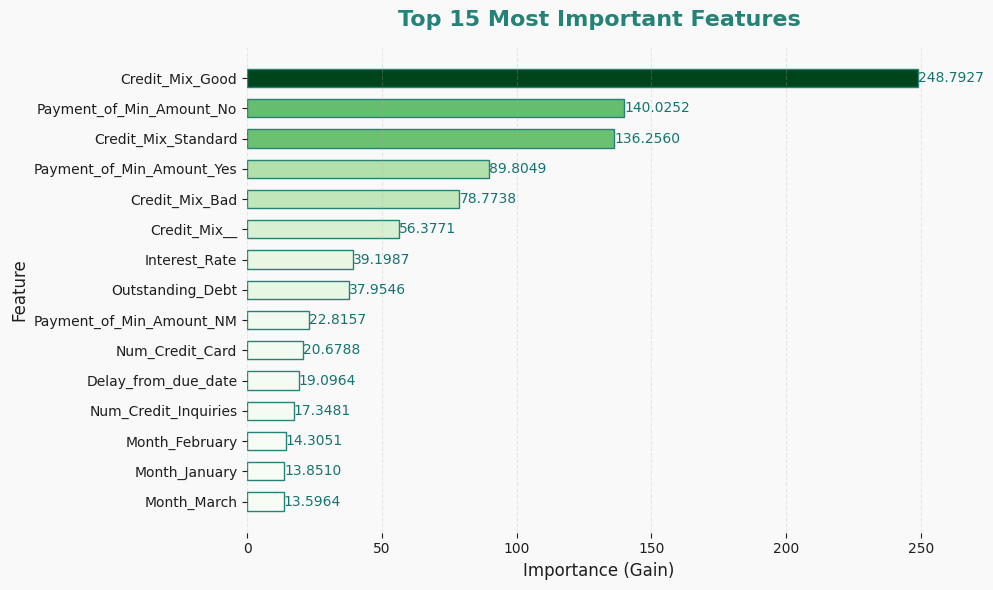

findfont: Generic family 'sans-serif' not found because none of the following families were found: Montserrat
findfont: Generic family 'sans-serif' not found because none of the following families were found: Montserrat
findfont: Generic family 'sans-serif' not found because none of the following families were found: Montserrat
findfont: Generic family 'sans-serif' not found because none of the following families were found: Montserrat
findfont: Generic family 'sans-serif' not found because none of the following families were found: Montserrat
findfont: Generic family 'sans-serif' not found because none of the following families were found: Montserrat
findfont: Generic family 'sans-serif' not found because none of the following families were found: Montserrat
findfont: Generic family 'sans-serif' not found because none of the following families were found: Montserrat
findfont: Generic family 'sans-serif' not found because none of the following families were found: Montserrat
findfont: 

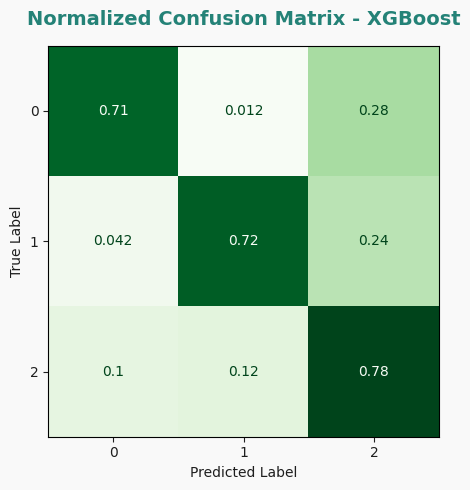

In [8]:
# ========================================
#   CreditScore - Teal Portfolio Visuals
# ========================================

import os
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier

# Kolory z Twojego CV
COLORS = {
    "HeaderBG": "#358F80",
    "AccentDark": "#248277",
    "AccentMedium": "#14746F",
    "BodyText": "#1E1E1E"
}

plt.rcParams.update({
    "axes.facecolor": "#F9F9F9",
    "figure.facecolor": "#F9F9F9",
    "axes.labelcolor": COLORS["BodyText"],
    "xtick.color": COLORS["BodyText"],
    "ytick.color": COLORS["BodyText"],
    "font.family": "sans-serif",
    "font.sans-serif": ["Montserrat"],
    "axes.titleweight": "bold"
})

# -------------------------------
#   PATHS
# -------------------------------
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))  # cofamy się o 1 poziom
DATA_DIR = os.path.join(BASE_DIR, "data")
MODEL_PATH = os.path.join(DATA_DIR, "XGBoost75Accuracy")
TRAIN_PATH = os.path.join(DATA_DIR, "train_preprocessed.csv")

# -------------------------------
#   LOAD MODEL & DATA
# -------------------------------
model = joblib.load(MODEL_PATH)
train = pd.read_csv(TRAIN_PATH)

X = train.drop(columns=["Credit_Score"])
y = train["Credit_Score"]

# -------------------------------
#   FEATURE IMPORTANCE
# -------------------------------
importance = model.get_booster().get_score(importance_type='gain')
imp_df = pd.DataFrame({
    'Feature': list(importance.keys()),
    'Importance': list(importance.values())
}).sort_values(by='Importance', ascending=False).head(15)

# gradient
norm = plt.Normalize(imp_df['Importance'].min(), imp_df['Importance'].max())
colors = plt.cm.Greens(norm(imp_df['Importance']))  # zbliżony do Twojego teal

plt.figure(figsize=(10, 6))
bars = plt.barh(
    imp_df['Feature'],
    imp_df['Importance'],
    color=colors,
    edgecolor=COLORS["AccentDark"],
    height=0.6
)

plt.title("Top 15 Most Important Features", fontsize=16, fontweight='bold', color=COLORS["AccentDark"], pad=15)
plt.xlabel("Importance (Gain)", fontsize=12, color=COLORS["BodyText"])
plt.ylabel("Feature", fontsize=12, color=COLORS["BodyText"])
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.25)
plt.box(False)

# wartości na końcu słupków
for bar in bars:
    plt.text(bar.get_width() + 0.001,
             bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.4f}",
             va='center', fontsize=10, color=COLORS["AccentMedium"])
plt.tight_layout()
plt.show()

# -------------------------------
#   CONFUSION MATRIX
# -------------------------------
from sklearn.model_selection import train_test_split

X_subtrain, X_val, y_subtrain, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
y_pred = model.predict(X_val)

cm = confusion_matrix(y_val, y_pred, normalize='true')

fig, ax = plt.subplots(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(y.unique()))
disp.plot(cmap='Greens', colorbar=False, ax=ax)

ax.set_title("Normalized Confusion Matrix - XGBoost", fontsize=14, fontweight='bold', color=COLORS["AccentDark"], pad=15)
ax.set_xlabel("Predicted Label", color=COLORS["BodyText"])
ax.set_ylabel("True Label", color=COLORS["BodyText"])
plt.grid(False)
plt.tight_layout()
plt.show()
